In [35]:
import json
import csv
import requests
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import numpy as np
from config import api
from citipy import citipy

In [36]:
# grab 500 random cities, loop them through the query

## Cities list

In [37]:
lar=(-90,90)
lor=(-180,180)
lalo=[]
cities=[]

la=np.random.uniform(low=-90.000,high=90.000,size=1500)
lo=np.random.uniform(low=-180.000,high=180.000,size=1500)
lalo=zip(la,lo)

for x in lalo:
    city=citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities:
        cities.append(city)

## Loop

In [38]:
wd=[]
settings={'units':'metric','appid':api}
summary = ['main.temp','main.humidity','wind.speed','clouds.all','coord.lon','coord.lat']

In [39]:
y=10
data=ow.get_current(cities[y],**settings)
data

{'coord': {'lon': -56.15, 'lat': 72.79},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': -18.47,
  'pressure': 995.64,
  'humidity': 100,
  'temp_min': -18.47,
  'temp_max': -18.47,
  'sea_level': 995.64,
  'grnd_level': 992.38},
 'wind': {'speed': 11.41, 'deg': 356.5},
 'clouds': {'all': 12},
 'dt': 1553484046,
 'sys': {'message': 0.0041,
  'country': 'GL',
  'sunrise': 1553505386,
  'sunset': 1553552681},
 'id': 3418910,
 'name': 'Upernavik',
 'cod': 200}

In [49]:

for y in range(0,10):
    data=ow.get_current(cities[y],**settings)

HTTPError: HTTP Error 404: Not Found

In [46]:
data

{'coord': {'lon': -134.97, 'lat': -23.12},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 26.38,
  'pressure': 1015.48,
  'humidity': 98,
  'temp_min': 26.38,
  'temp_max': 26.38,
  'sea_level': 1015.48,
  'grnd_level': 1015.42},
 'wind': {'speed': 5.66, 'deg': 72.0003},
 'clouds': {'all': 20},
 'dt': 1553484284,
 'sys': {'message': 0.0033,
  'country': 'PF',
  'sunrise': 1553439898,
  'sunset': 1553483233},
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [47]:
type(cities)
cdf=pd.DataFrame(cities,columns=['Cities'])
cdf.to_csv('cities.csv',index=False)

In [50]:
with open("cities.csv") as cf:
    cr=csv.reader(cf)
    cities=[city[0] for city in cr]
    wd=[ow.get_current(city, **settings) for city in cities]

HTTPError: HTTP Error 404: Not Found

In [51]:
data=[response(*summary) for response in wd]
wd=pd.DataFrame(data,index=cities)

TypeError: 'str' object is not callable

In [12]:
wd.head()

,0,1,2,3,4,5
Cities,3.44,93,1.5,80,1.45,52.47
mataura,3.44,93,1.5,80,1.45,52.47
avarua,3.44,93,1.5,80,1.45,52.47
puerto madryn,3.44,93,1.5,80,1.45,52.47
mahebourg,3.44,93,1.5,80,1.45,52.47


##YAY 

In [ ]:
# Print log? wut why

In [121]:
location=(-110.01,27.52)
data=ow.get_current(location,units='metric')

HTTPError: HTTP Error 401: Unauthorized

In [105]:
wd.columns=['Temperature','Humidity','Wind Speed','Cloudiness','Longitude','Latitude']
# col=wd.columns.tolist()
# cols=col[:-2]+col[-1:]+col[4:-1]
# wd=wd[cols]

wd.head()

,Temperature,Humidity,Wind Speed,Cloudiness,Longitude,Latitude
kalmunai,20.59,36,1.51,0,27.52,-110.01
kosh-agach,20.59,36,1.51,0,27.52,-110.01
lagoa,20.59,36,1.51,0,27.52,-110.01
mataura,20.59,36,1.51,0,27.52,-110.01
atuona,20.59,36,1.51,0,27.52,-110.01


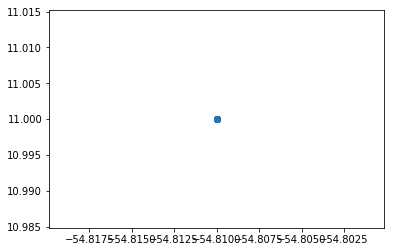

In [91]:
x=wd['Latitude']
y=wd['Temperature']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Latitue (24/03/2019)')

In [ ]:
##So that's not good.